## Observations and Insights 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

#Set up path variables to data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path  = "data/Study_results.csv"
merged_data_csv     = "data/merged_data.csv"

# Read the mouse data and the study results into pandas dataframes
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results  = pd.read_csv(study_results_path)



In [38]:
#Check the study data
study_results.describe()
study_results.count()
study_results.dtypes


Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [39]:
# Combine the data into a single dataset joining on Mouse ID
merge_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_mouse_data.shape 
#Lets save the merge data to a file to enable checks using Excel.
merge_mouse_data.to_csv("data/merged_data.csv", index=False, header=True)
# Display the data table for preview. Combined data has 1893 rows
merge_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [40]:
# Checking the number of mice.
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [41]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRowsDF = merge_mouse_data[merge_mouse_data.duplicated(['Mouse ID','Timepoint'])]
duplicateRowsDF.count()  # Looks like only 5 duplicates
duplicateRowsDF.head(20) # Duplicates relate to only one mouse, Id g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df=merge_mouse_data.drop(index=[909,911,913,915,917])

clean_data_df.shape # Only 1888 rows now, so 5 records ie the duplicates dropped
clean_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# Checking the number of mice in the clean DataFrame.
clean_data_df.count()


Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
clean_data_df.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [45]:
#Save data for each drug for future SEM calculation

ramicane_df=clean_data_df.loc[clean_data_df["Drug Regimen"]=="Ramicane", :]
capomulin_df=clean_data_df.loc[clean_data_df["Drug Regimen"]=="Capomulin", :]
infubinol_df=clean_data_df.loc[clean_data_df["Drug Regimen"]=="Infubinol", :]
placebo_df=clean_data_df.loc[clean_data_df["Drug Regimen"]=="Placebo", :]
ceftamin_df=clean_data_df.loc[clean_data_df["Drug Regimen"]=="Ceftamin", :]
stelasyn_df=clean_data_df.loc[clean_data_df["Drug Regimen"]=="Stelasyn", :]
zoniferol_df=clean_data_df.loc[clean_data_df["Drug Regimen"]=="Zoniferol", :]
ketapril_df=clean_data_df.loc[clean_data_df["Drug Regimen"]=="Ketapril", :]
propriva_df=clean_data_df.loc[clean_data_df["Drug Regimen"]=="Propriva", :]
naftisol_df=clean_data_df.loc[clean_data_df["Drug Regimen"]=="Naftisol", :]

# Calculate the SEM for each drug and save it

Drug_sem_df= pd.DataFrame({"Ramicane"  : [ramicane_df["Tumor Volume (mm3)"].sem()],
                           "Capomulin" :[capomulin_df["Tumor Volume (mm3)"].sem()],
                           "Infubinol" :[infubinol_df["Tumor Volume (mm3)"].sem()],
                           "Placebo"   :[placebo_df["Tumor Volume (mm3)"].sem()],
                           "Ceftamin"  :[ceftamin_df["Tumor Volume (mm3)"].sem()],
                           "Stelasyn"  :[stelasyn_df["Tumor Volume (mm3)"].sem()],
                           "Zoniferol" :[zoniferol_df["Tumor Volume (mm3)"].sem()],
                           "Ketapril"  :[ketapril_df["Tumor Volume (mm3)"].sem()],
                           "Naftisol"  :[naftisol_df["Tumor Volume (mm3)"].sem()]
})
Drug_sem_df.index.names = ['SEM']
Drug_sem_df


,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Naftisol
SEM,,,,,,,,,
0,0.320955,0.329346,0.492236,0.581331,0.469821,0.573111,0.516398,0.60386,0.596466























## Bar and Pie Charts

,Drug Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


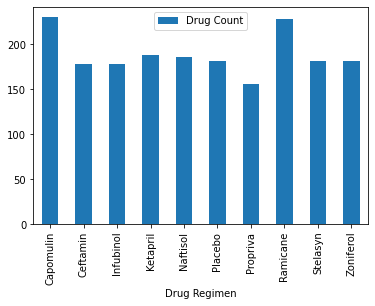

In [121]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

DrugSumm_pf2=pd.DataFrame({"Drug Count" : DrugCount}) 
DrugSumm_pf2.plot.bar();
DrugSumm_pf2

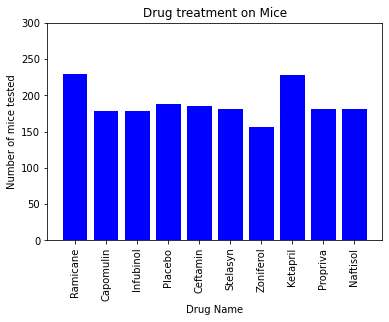

In [117]:
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis=['Ramicane', 'Capomulin', 'Infubinol', 'Placebo',
 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 
 'Propriva', 'Naftisol']
plt.xticks(rotation="vertical")

y_axis=DrugSumm_pf2["Drug Count"]

# Set the limits of the y axis
plt.ylim(0, 300)
plt.title("Drug treatment on Mice")
plt.xlabel("Drug Name")
plt.ylabel("Number of mice tested")
plt.bar(x_axis, y_axis, color="b",align="center");

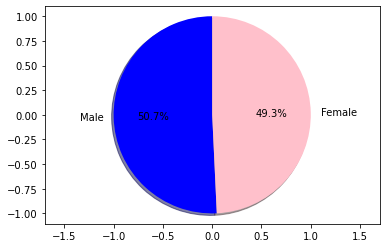

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis=["Male","Female"]
y_axis=[malecount,femalecount]
#df=DrugSumm_pf({'Drug': x_axis, 'Mice Count': malecount+femalecount}, index=index)
colors=["blue","pink"]
explode=(0,0)
plt.axis("equal")
plt.pie(y_axis,explode=explode,labels=x_axis,colors=colors, frame=True,
        autopct="%1.1f%%", shadow=True, startangle=90);



## Quartiles, Outliers and Boxplots

In [125]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
CapomulinSet=(clean_data_df.loc[(clean_data_df["Drug Regimen"]=="Capomulin" ) & (clean_data_df["Timepoint"]==45), :])
RamicaneSet=(clean_data_df.loc[(clean_data_df["Drug Regimen"]=="Ramicane" ) & (clean_data_df["Timepoint"]==45), :])
InfubinolSet=(clean_data_df.loc[(clean_data_df["Drug Regimen"]=="Infubinol" ) & (clean_data_df["Timepoint"]==45), :])
CeftaminSet=(clean_data_df.loc[(clean_data_df["Drug Regimen"]=="Ceftamin" ) & (clean_data_df["Timepoint"]==45), :])

CapomulinSet_df=pd.DataFrame(clean_data_df.loc[(clean_data_df["Drug Regimen"]=="Capomulin" ) & (clean_data_df["Timepoint"]==45), :])
RamicaneSet_df=pd.DataFrame(clean_data_df.loc[(clean_data_df["Drug Regimen"]=="Ramicane" ) & (clean_data_df["Timepoint"]==45), :])
InfubinolSet_df=pd.DataFrame(clean_data_df.loc[(clean_data_df["Drug Regimen"]=="Infubinol" ) & (clean_data_df["Timepoint"]==45), :])
CeftaminSet_df=pd.DataFrame(clean_data_df.loc[(clean_data_df["Drug Regimen"]=="Ceftamin" ) & (clean_data_df["Timepoint"]==45), :])

combined_finaltumoursize_df = [CapomulinSet_df, RamicaneSet_df, InfubinolSet_df,CeftaminSet_df]
result_df = pd.concat(combined_finaltumoursize_df)
result_df.to_csv("data/finaltumoursize.csv", index=False, header=True)
result_df.head(100)


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
...,...,...,...,...,...,...,...,...
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4


In [119]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_Treatments=['CapomulinSet', 'RamicaneSet','InfubinolSet','CeftaminSet']

# Create empty list to fill with tumor vol data (for plotting)
tumourVolume=[] 
for drug in Drug_Treatments:
    tumourVolume=result_df["Tumor Volume (mm3)"]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    # If the data is in a dataframe, we use pandas to give quartile calculations
tumourvolume_df= clean_data_df["Tumor Volume (mm3)"]
quartiles = tumourvolume_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumour Volume is: {lowerq}")
print(f"The upper quartile of Tumour Volume is: {upperq}")
print(f"The interquartile range of Tumour Volume is: {iqr}")
print(f"The the median of Tumour Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumour Volume is: 45.0
The upper quartile of Tumour Volume is: 56.32407510749999
The interquartile range of Tumour Volume is: 11.324075107499993
The the median of Tumour Volume is: 48.951421075 
Values below 28.01388733875001 could be outliers.
Values above 73.31018776874998 could be outliers.


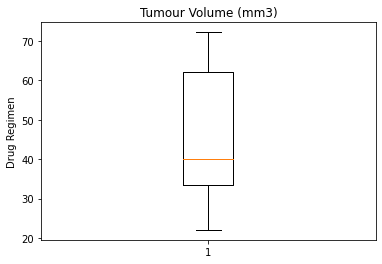

In [120]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumour Volume (mm3)')
ax1.set_ylabel('Drug Regimen')
ax1.boxplot(tumourVolume);    
  

## Line and Scatter Plots

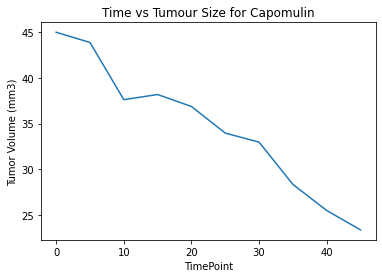

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [96]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


CapomulinOnly=(clean_data_df.loc[(clean_data_df["Drug Regimen"]=="Capomulin" ) & (clean_data_df["Mouse ID"]=='s185'), :])
CapomulinOnly
x_axis_data=CapomulinOnly["Timepoint"]
y_axis_data=CapomulinOnly["Tumor Volume (mm3)"]
plt.title("Time vs Tumour Size for Capomulin")
plt.xlabel("TimePoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis_data, y_axis_data)
plt.show()
CapomulinOnly

(0.0, 100.0)

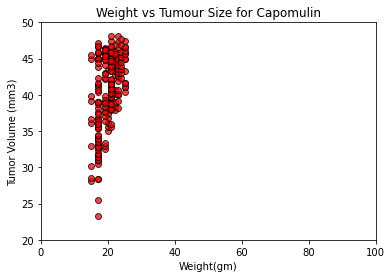

In [99]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
CapomulinOnly=(clean_data_df.loc[(clean_data_df["Drug Regimen"]=="Capomulin" ), :])
CapomulinOnly.describe()
x_axis_data=CapomulinOnly["Weight (g)"]
y_axis_data=CapomulinOnly["Tumor Volume (mm3)"]
plt.title("Weight vs Tumour Size for Capomulin")
plt.xlabel("Weight(gm)")
plt.ylabel("Tumor Volume (mm3)")
#plt.plot(x_axis_data, y_axis_data)
#plt.show()
#CapomulinOnly

plt.scatter(x_axis_data, y_axis_data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(20,50)

# The x limits of our scatter plot is 0 to 100
plt.xlim(0, 100)

## Correlation and Regression

In [114]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = clean_data_df.iloc[:,4]
tumourvolume = clean_data_df.iloc[:,6]
correlation = st.pearsonr(weight,tumourvolume)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#clean_data_df.iloc[:,6]


The correlation between both factors is 0.59


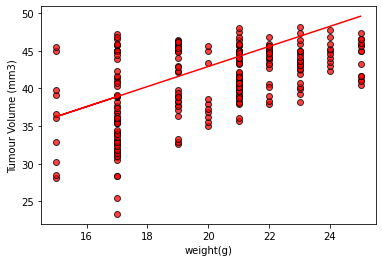

In [107]:
weight = clean_data_df['Weight (g)']
tumourvolume = clean_data_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumourvolume)
regress_values = x_axis_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis_data, y_axis_data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
#plt.scatter(weight,tumourvolume)
plt.plot(x_axis_data,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('weight(g)')
plt.ylabel('Tumour Volume (mm3)');